# 1.- Introduction

Nama      : Hasan Abdul Hamid

Batch     : SBY-03

Data      : [Data](https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset)

Objective : In this project we will create a model to predict whether someone is at risk of having a stroke

# 2.- Import Library

In [1]:
!pip install feature-engine

# For basic use
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import kendalltau, pearsonr

# For visualize
import matplotlib.pyplot as plt
import seaborn as sns

# For algorithms
import sklearn
import imblearn
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

# Saving Model
import pickle
import json

# 4.- Data Loading

In [2]:
# For load data in drive
from google.colab import drive
drive.mount('/content/drive')

df_ori = pd.read_csv('/content/drive/MyDrive/brain_stroke.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = df_ori.copy()   # Copy data original for analysis

In [4]:
df.head(10)   # Show top 10 data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [5]:
df.tail(10)   # Show bottom 10 data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4971,Male,37.00,0,0,Yes,Private,Rural,107.06,29.7,smokes,0
4972,Male,72.00,0,1,Yes,Private,Rural,238.27,30.7,smokes,0
4973,Male,1.32,0,0,No,children,Rural,107.02,18.8,Unknown,0
4974,Male,58.00,0,0,Yes,Govt_job,Urban,84.94,30.2,never smoked,0
4975,Male,31.00,0,0,No,Private,Urban,215.07,32.7,smokes,0
4976,Male,41.00,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.00,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.00,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.00,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.00,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [6]:
df.info()   # Info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:
# Change column name into lowercase
df.columns = df.columns.str.lower()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [9]:
df.duplicated().sum()

0

No duplicate data found.

In [10]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


# 5.- Exploratory Data Analysis

## 5.1.- Data Information

1. gender: "Male" or "Female"

2. age: age of the patient

3. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

4. heart disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

5. Ever-married: "No" or "Yes"

6. work type: "children", "Govtjov", "Private" or "Self-employed"

7. Residencetype: "Rural" or "Urban"

8. avg glucose level: average glucose level in blood

9. BMI: body mass index

10. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

11. stroke: 1 if the patient had a stroke or 0 if not

## 5.2.- Making Function

In [12]:
# Descriptive Analysis Function
def an_desc(col):
    # Analysis Descriptive Data
    mean = df[col].mean().round(2)
    min = df[col].min().__round__(2)
    max = df[col].max().__round__(2)
    std = df[col].std().__round__(2)

    print(f"Average of {col} is {mean}")
    print(f"Minimum value of {col} is {min}")
    print(f"Maximum value of {col} is {max}")
    print(f"Standard Deviation of {col} is {std}")

In [13]:
# Create Histogram
def hist(col):
    plt.figure(figsize=(8,4))

    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

In [14]:
# Find Lower Bound and Upper Bound

# Normal distribution
def outlier_norm(col):

    # Boxplot data distribution
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    # Lower dan Upper Bound data
    low_bound = np.mean(df[col]) - 3 * np.std(df[col])
    up_bound = np.mean(df[col]) + 3 * np.std(df[col])

    print(f'Lower Boundary data {col} is {low_bound:.2f}')
    print(f'Upper Boundary data {col} is {up_bound:.2f}')

    outlier = df[col][(df[col]<low_bound) | (df[col]>up_bound)]
    no_outlier = df[col][(df[col]>=low_bound) & (df[col]<=up_bound)]

    print(f'Percentage of outliers: {len(outlier)*100/len(df[col]):.2f}%%')

# Data Skew
def outlier_skew(col):
    # Boxplot data distribution
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    # Lower Bound dan Upper Bound
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    low_bound = q1 - 3 * iqr
    up_bound = q3 + 3 * iqr

    print(f'Lower Boundary data {col} is: {low_bound:.2f}')
    print(f'Upper Boundary data {col} is: {up_bound:.2f}' )

    outlier = df[col][(df[col]<low_bound) | (df[col]>up_bound)]
    no_outlier = df[col][(df[col]>=low_bound) & (df[col]<=up_bound)]

    print(f'Percentage of outliers: {len(outlier)*100/len(df[col]):.2f}%%')

In [15]:
# Correlation between two variable
def kendall(satu, dua):
  # Mencari korelasi antar data dengan metode kendall-tau
  corr_tau, pval_k = stats.kendalltau(df[satu], df[dua])

  # Mencetak hasil uji korelasi
  print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

## 5.3.- Target

In [16]:
# Total patient
df['stroke'].count()

4981

There are a total of 4981 total patients in the data.

In [17]:
'''
Target in analysis is stroke
'''
patient_compare = df['stroke'].value_counts().reset_index()
patient_compare

,index,stroke
0,0,4733
1,1,248


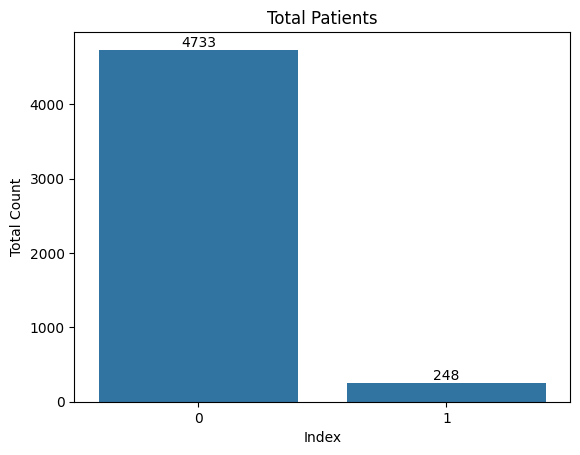

In [18]:
# Create barplot Total Patient
sns.barplot(data=patient_compare, x='index', y='stroke')
plt.title("Total Patients")
plt.xlabel("Index")
plt.ylabel("Total Count")
plt.bar_label(plt.gca().containers[0])

plt.show()

From the data above, it was found that there were 248 positive stroke patients.

## 5.4.- Numerical

### 5.4.1.- Age

In [19]:
# Checking total unique value in data
df['age'].nunique()

104

In [20]:
# Descriptive data
an_desc('age')

Average of age is 43.42
Minimum value of age is 0.08
Maximum value of age is 82.0
Standard Deviation of age is 22.66


From this data, we will group patients based on age groups in a new column.

There are 7 age divisions in English. The terms for dividing or using age in English are:

- Infants: 0-23 months
- Newborn: 0-1 month
- Child : 2-12 years
- Teenagers: 13-17 years
- Young (adult): 19-45 years
- Middle-aged: 45-64 years
- Old (Senior citizen): 65+

To reduce the level of cardinality in the data, we will combine "Infant" and "Newborn" into "Baby" where the patient is less than 2 years old.

In [21]:
# Create new column for grouping age
group_age = []

for i in df['age']:
    if i <= 2:
        group_age.append('Baby')
    elif i <= 12:
        group_age.append('Child')
    elif i <= 17:
        group_age.append('Teenagers')
    elif i <= 45:
        group_age.append('Young Adult')
    elif i <= 64:
        group_age.append('Middle Age')
    else:
        group_age.append('Elder')

# Concat into df table
df['group_age'] = group_age
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,group_age
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elder
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elder
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Middle Age
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elder
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Elder
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,Elder
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,Elder
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,Elder
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1,Elder
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1,Middle Age


We will count the number of patients based on age groups

In [22]:
# Total Patient Based group_age
df['group_age'].value_counts()

Young Adult    1715
Middle Age     1423
Elder          1020
Child           406
Teenagers       249
Baby            168
Name: group_age, dtype: int64

From the data above, we find that Middle Age patients are the majority of patients with a total of 1509 patients. Next, the data will be analyzed in the `Nominal` data subsection in the `group_age` variable.

### 5.4.2.- Hypertension

In [23]:
# Total patient based on hypertension
hyper_patient = df['hypertension'].value_counts().reset_index()
hyper_patient

,index,hypertension
0,0,4502
1,1,479


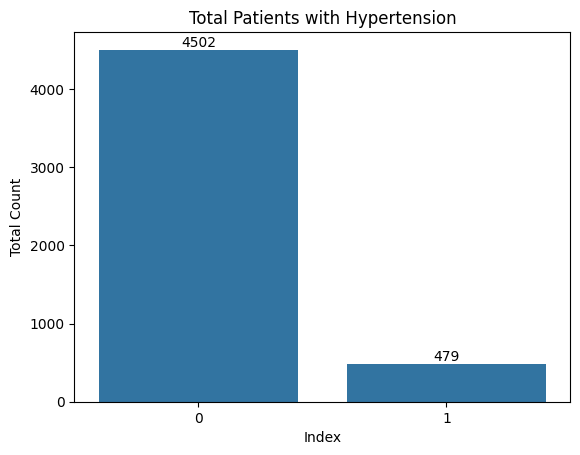

In [24]:
# Creat barplot Hypertension
sns.barplot(data=hyper_patient, x='index', y='hypertension')
plt.title("Total Patients with Hypertension")
plt.xlabel("Index")
plt.ylabel("Total Count")
plt.bar_label(plt.gca().containers[0])

plt.show()

There were 479 patients with hypertension. We will find out further how many patients experience strokes.

In [25]:
# Looking for stroke patients grouped based on certain variables
stroke_by_hyper = df[df["stroke"] == 1]["hypertension"].value_counts().reset_index()
stroke_by_hyper

,index,hypertension
0,0,182
1,1,66


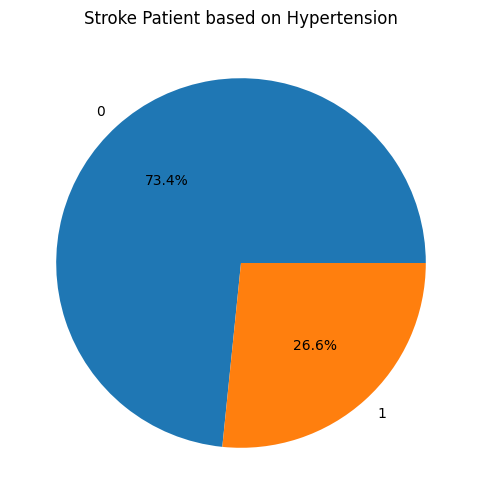

In [26]:
# Pie Chart Hypertension Group
plt.figure(figsize=(6,6))
plt.title("Stroke Patient based on Hypertension")
plt.pie(stroke_by_hyper['hypertension'], labels=stroke_by_hyper['index'], autopct='%1.1f%%')
plt.show()

Of the total patients, 26.6% were patients with stroke. The next step, we want to find out whether there is a correlation between the level of hypertension and stroke.

In [27]:
# Find correlation data with kendall-tau
kendall('stroke', 'hypertension')

tau-correlation: 0.13, p-value: 1.246580814481342e-20


With an error coefficient of 5%, it was found that there was a significant positive relationship between hypertension and stroke of 13%. This is indicated by the P-value which is smaller than the error coefficient (1.246e-20).

### 5.4.3.- Heart Disease

In [28]:
hd_patient = df['heart_disease'].value_counts().reset_index()
hd_patient

,index,heart_disease
0,0,4706
1,1,275


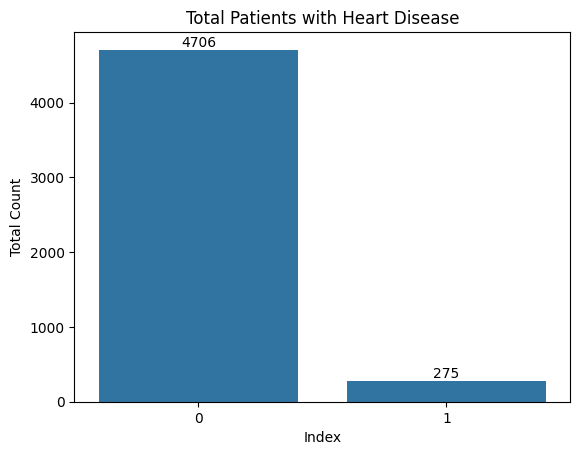

In [29]:
# Heart disease Barplot
sns.barplot(data=hd_patient, x='index', y='heart_disease')
plt.title("Total Patients with Heart Disease")
plt.xlabel("Index")
plt.ylabel("Total Count")
plt.bar_label(plt.gca().containers[0])

plt.show()

From the data above, it was found that there were 275 patients with heart disease. Next, we will find out the number of stroke patients with heart disease.

In [30]:
stroke_by_heart_dis = df[df["stroke"] == 1]["heart_disease"].value_counts().reset_index()
stroke_by_heart_dis

,index,heart_disease
0,0,201
1,1,47


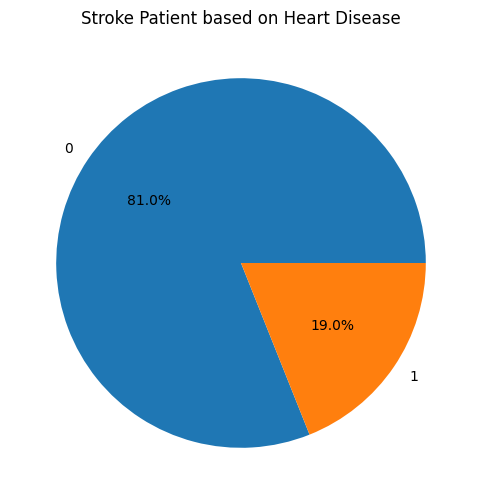

In [31]:
# Pie Chart Stroke Patient based on Heart Disease
plt.figure(figsize=(6,6))
plt.title("Stroke Patient based on Heart Disease")
plt.pie(stroke_by_heart_dis['heart_disease'], labels=stroke_by_heart_dis['index'], autopct='%1.1f%%')
plt.show()

Of the total number of patients who have heart disease, 19% of the total patients suffer from stroke. The next step is to find out whether there is a correlation between heart disease and stroke.

In [32]:
# Looking for correlation between data using the Kendall-Tau method
kendall('stroke', 'heart_disease')

tau-correlation: 0.13, p-value: 2.11244799737147e-21


With an error coefficient of 5%, it was found that there was a significant positive relationship between heart disease and stroke of 13%. This is indicated by the P-value which is smaller than the error coefficient (2.112e-21).

### 5.4.4.- Average Glucose Level

In [33]:
an_desc('avg_glucose_level')

Average of avg_glucose_level is 105.94
Minimum value of avg_glucose_level is 55.12
Maximum value of avg_glucose_level is 271.74
Standard Deviation of avg_glucose_level is 45.08


We will see how the average glucose level data is distributed in the data.

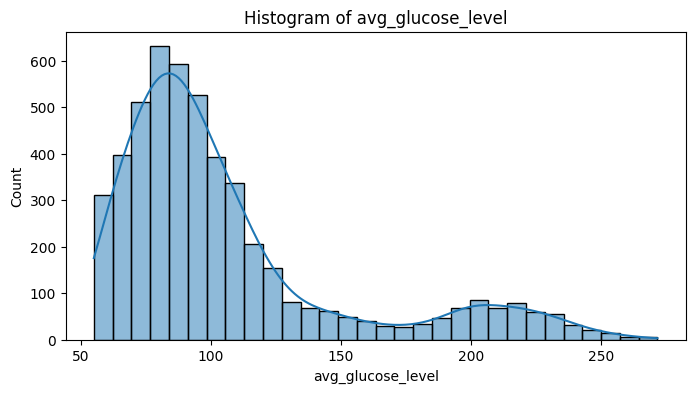

In [34]:
hist('avg_glucose_level')

Based on the histogram chart above, it can be seen that the data is distributed skewed to the right. Next, we will find out the Lower Boundary and Upper Boundary in the data and find out what percentage of outlier data there is.

Lower Boundary data avg_glucose_level is: -32.66
Upper Boundary data avg_glucose_level is: 223.75
Percentage of outliers: 3.31%%


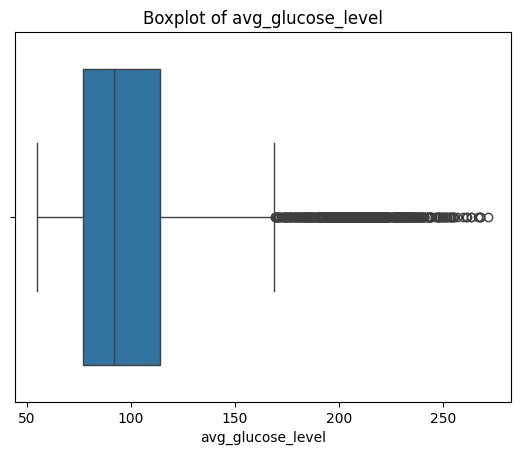

In [35]:
outlier_skew('avg_glucose_level')

From the data above, it was found that 3.31% were outlier data. Outlier handling will be done in `Feature Engineering`. Next, we will find out the relationship between average glucose level and stroke.

In [36]:
# Mencari korelasi antar data dengan metode kendall-tau
kendall('stroke', 'avg_glucose_level')

tau-correlation: 0.07, p-value: 4.915888509702414e-09


With an error coefficient of 5%, it was found that there was a significant positive relationship between avg glucose level and stroke of 7%. This is indicated by the P-value which is smaller than the error coefficient (4.916e-09).

### 5.4.5.- BMI

In [37]:
an_desc('bmi')

Average of bmi is 28.5
Minimum value of bmi is 14.0
Maximum value of bmi is 48.9
Standard Deviation of bmi is 6.79


Next we will look at the distribution of BMI data using a histogram.

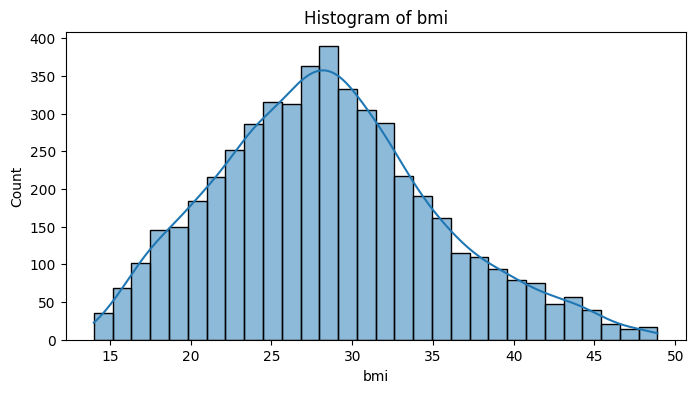

In [38]:
hist('bmi')

Based on the histogram chart above, it can be seen that the data is distributed towards the middle. Next, we will look at the level of data skewness.

In [39]:
df['bmi'].skew()

0.37155291522876177

The results of checking the skewness of BMI data show that the distribution of BMI data tends to be normally distributed. Next we will find out the Lower Boundary and Upper Boundary in the data and find out what percentage of outlier data there is.

Lower Boundary data bmi is 8.13
Upper Boundary data bmi is 48.87
Percentage of outliers: 0.06%%


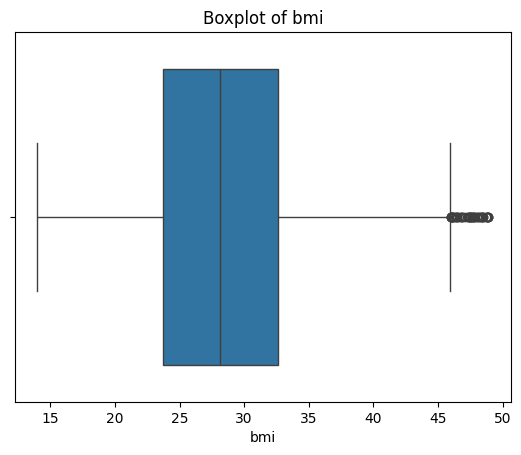

In [40]:
outlier_norm('bmi')

From the data above, it was found that 0.06% was outlier data. Outlier handling will be done in `Feature Engineering`. Next we will find out the relationship between BMI and stroke.

In [41]:
# Checking correlation with kendall-tau
kendall('stroke', 'bmi')

tau-correlation: 0.05, p-value: 1.1156173836715852e-05


With an error coefficient level of 5%, it was found that there was a significant positive relationship between BMI and stroke of 5%. This is indicated by the P-value which is smaller than the error coefficient number (1.1156e-05).

## 5.5.- Nominal

### 5.5.1.- Group Age

In [42]:
clus_age = df['group_age'].value_counts().reset_index()
clus_age

,index,group_age
0,Young Adult,1715
1,Middle Age,1423
2,Elder,1020
3,Child,406
4,Teenagers,249
5,Baby,168


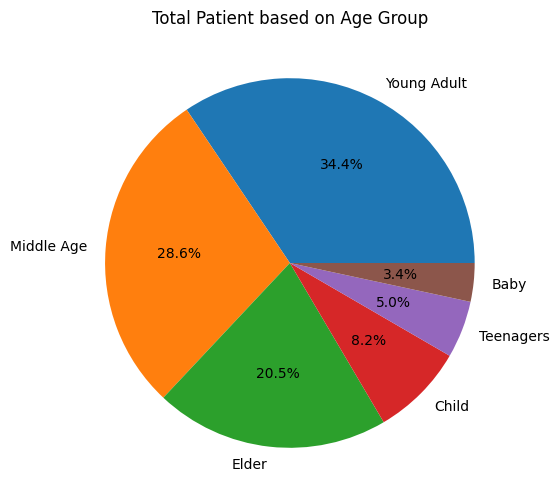

In [43]:
# Pie Chart Age Group
plt.figure(figsize=(6,6))
plt.title("Total Patient based on Age Group")
plt.pie(clus_age['group_age'], labels=clus_age['index'], autopct='%1.1f%%')
plt.show()

The Middle age group is the patient in the data with a percentage of 30.3% with a total of 1509 patients. Next, we want to find out the number of patients who were positively diagnosed with stroke based on age group.

In [44]:
stroke_by_age = df[df["stroke"] == 1]["group_age"].value_counts().reset_index()
stroke_by_age

,index,group_age
0,Elder,159
1,Middle Age,77
2,Young Adult,10
3,Teenagers,1
4,Baby,1


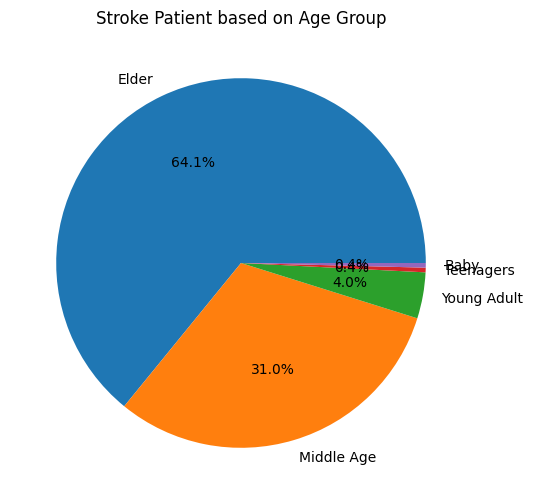

In [45]:
# Pie Chart Age Group
plt.figure(figsize=(6,6))
plt.title("Stroke Patient based on Age Group")
plt.pie(stroke_by_age['group_age'], labels=stroke_by_age['index'], autopct='%1.1f%%')
plt.show()

The majority of stroke patients were elderly with a total of 159 patients. This figure represents 64.1% of stroke patients in the data. Next we will find out whether there is a correlation between group_age and stroke.

In [46]:
# Mencari korelasi antar data dengan metode kendall-tau
kendall('stroke', 'group_age')

tau-correlation: -0.14, p-value: 7.87302717026765e-26


The results of the correlation between the two variables, it was found that there was a significant influence between group age and stroke. This is indicated by the P-value which is smaller than the error coefficient number (7.8730e-26).

### 5.5.2.- Smoking Status

In [47]:
df['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

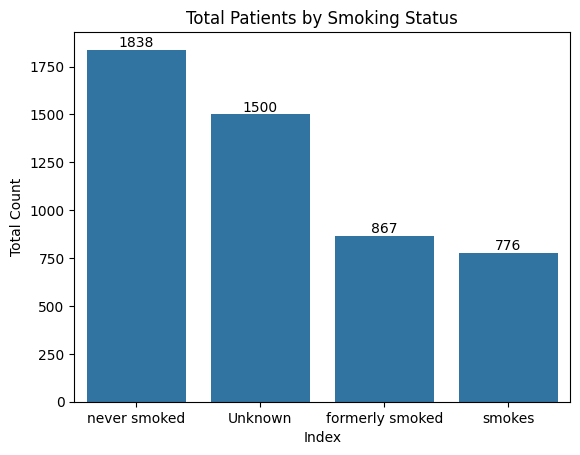

In [48]:
# Create table Patients by Smoking Status
smoking_data = df['smoking_status'].value_counts().reset_index()

# create barplot
sns.barplot(data=smoking_data, x='index', y='smoking_status')
plt.title("Total Patients by Smoking Status")
plt.xlabel("Index")
plt.ylabel("Total Count")
plt.bar_label(plt.gca().containers[0])

plt.show()

The majority of patients in the data were non-smokers with a total of 1838 patients. Next, we find out the correlation between smoking status and stroke.

In [49]:
# Kendall-tau
kendall('stroke', 'smoking_status')

tau-correlation: 0.02, p-value: 0.06938703986366354


With an error coefficient level of 5%, it was found that there was a less significant positive relationship between smoking status and stroke at 2%. This is indicated by the P-value which is smaller than the error coefficient (0.069).

### 5.5.3.- Gender

We will find out the number of patients in the data based on gender.

In [50]:
df['gender'].value_counts()

Female    2907
Male      2074
Name: gender, dtype: int64

There were 2907 female patients and 2074 male patients in the data. Next we will look at the number of stroke patients based on gender.

In [51]:
stroke_by_gender = df[df["stroke"] == 1]["gender"].value_counts().reset_index()
stroke_by_gender

,index,gender
0,Female,140
1,Male,108


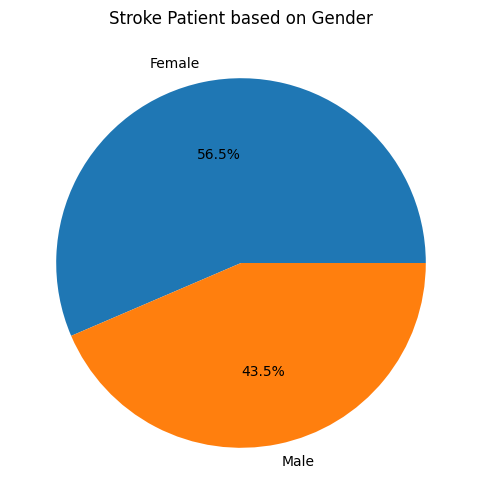

In [52]:
# Pie Chart Gender
plt.figure(figsize=(6,6))
plt.title("Stroke Patient based on Gender")
plt.pie(stroke_by_gender['gender'], labels=stroke_by_gender['index'], autopct='%1.1f%%')
plt.show()

Based on the results of the analysis above, the largest number of stroke patients based on gender were female with a total of 140 patients (56.5%).

In [53]:
# Mencari korelasi antar data dengan metode kendall-tau
kendall('stroke', 'gender')

tau-correlation: 0.01, p-value: 0.5313548935138359


With an error coefficient of 5%, it was found that there was no significant relationship between gender and stroke. This is indicated by the P-value which is smaller than the error coefficient (0.5313).

### 5.5.4.- Ever Married

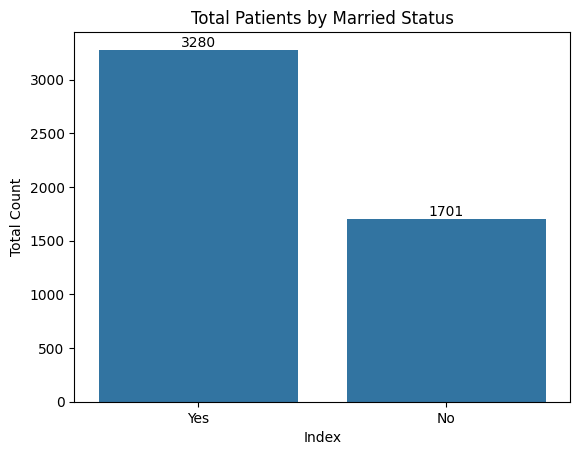

In [54]:
# Patients by Married Status
married_data = df['ever_married'].value_counts().reset_index()

# Barplot
sns.barplot(data=married_data, x='index', y='ever_married')
plt.title("Total Patients by Married Status")
plt.xlabel("Index")
plt.ylabel("Total Count")
plt.bar_label(plt.gca().containers[0])

plt.show()

In [55]:
# Looking for stroke patients grouped based on certain variables
stroke_by_married = df[df["stroke"] == 1]["ever_married"].value_counts().reset_index()
stroke_by_married

,index,ever_married
0,Yes,219
1,No,29


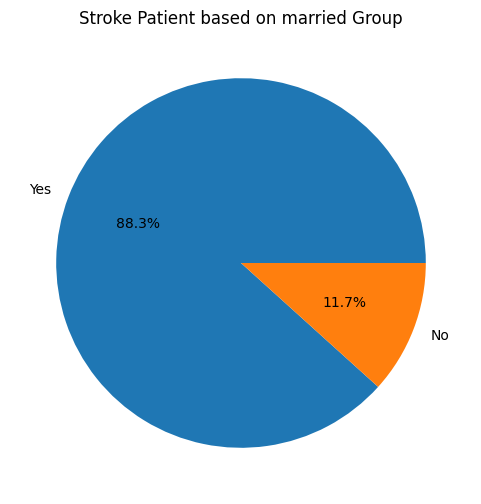

In [56]:
# Pie Chart
plt.figure(figsize=(6,6))
plt.title("Stroke Patient based on married Group")
plt.pie(stroke_by_married['ever_married'], labels=stroke_by_married['index'], autopct='%1.1f%%')
plt.show()

There were 219 stroke patients who were married, which was 88.3% of stroke patients. Next, we want to look at the relationship between ever being married and stroke.

In [57]:
# Kendall-tau
kendall('stroke', 'ever_married')

tau-correlation: 0.11, p-value: 2.016699358487649e-14


With an error coefficient of 5%, it was found that there was a significant positive relationship between ever married and stroke of 11%. This is indicated by the P-value which is smaller than the error coefficient (2.0167e-14).

### 5.5.5.- Work Type

In [58]:
work_type_table = df['work_type'].value_counts().reset_index()
work_type_table

,index,work_type
0,Private,2860
1,Self-employed,804
2,children,673
3,Govt_job,644


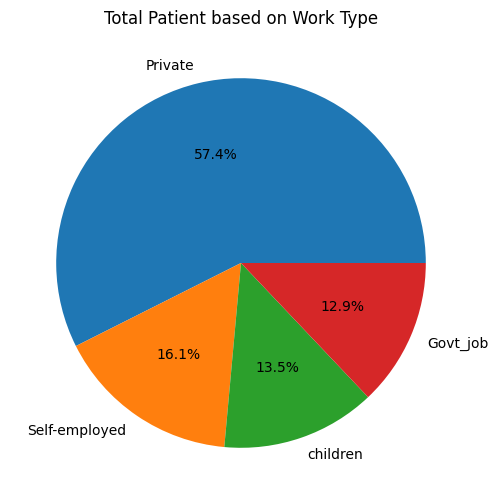

In [59]:
# Pie Chart Work Type
plt.figure(figsize=(6,6))
plt.title("Total Patient based on Work Type")
plt.pie(work_type_table['work_type'], labels=work_type_table['index'], autopct='%1.1f%%')
plt.show()

The majority of patient jobs in the data are Private or confidential with a total of 2860 or approximately 57.4% of the data population.

In [60]:
# Kendall-tau
kendall('stroke', 'work_type')

tau-correlation: -0.02, p-value: 0.06203834211020693


With an error coefficient level of 5%, it was found that there was a less significant negative relationship between smoking status and stroke at 2%. This is indicated by the P-value which is smaller than the error coefficient (0.062).

### 5.5.6.- Residence Type

In [61]:
df['residence_type'].value_counts()

Urban    2532
Rural    2449
Name: residence_type, dtype: int64

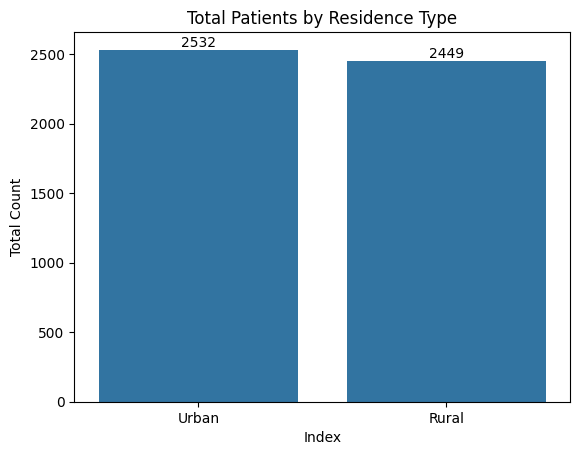

In [62]:
# Patients by Residence Type
residence_data = df['residence_type'].value_counts().reset_index()

# Barplot
sns.barplot(data=residence_data, x='index', y='residence_type')
plt.title("Total Patients by Residence Type")
plt.xlabel("Index")
plt.ylabel("Total Count")
plt.bar_label(plt.gca().containers[0])

plt.show()

In [63]:
stroke_by_residence = df[df["stroke"] == 1]["residence_type"].value_counts().reset_index()
stroke_by_residence

,index,residence_type
0,Urban,135
1,Rural,113


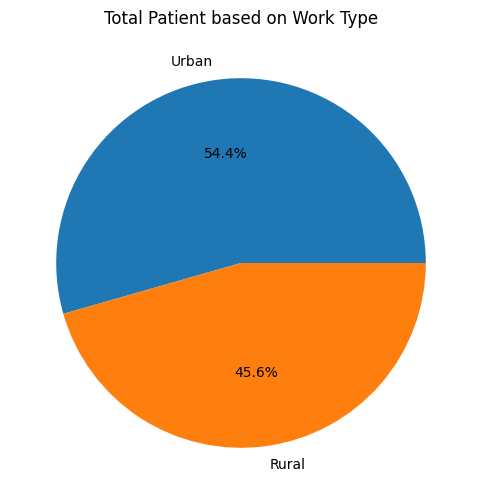

In [64]:
# Pie Chart Work Type
plt.figure(figsize=(6,6))
plt.title("Total Patient based on Work Type")
plt.pie(stroke_by_residence['residence_type'], labels=stroke_by_residence['index'], autopct='%1.1f%%')
plt.show()

There were 135 stroke patients living in urban areas, 54.4% of the data. Meanwhile, 113 other patients live in rural areas. Next, we want to see the level of correlation between residence type and stroke.

In [65]:
# Mencari korelasi antar data dengan metode kendall-tau
kendall('stroke', 'residence_type')

tau-correlation: 0.02, p-value: 0.24443312841059506


With an error coefficient level of 5%, it was found that there was a less significant relationship between smoking status and stroke at 2%. This is indicated by the P-value which is smaller than the error coefficient (0.2444).

## 5.3.- EDA Conclusion

1. From the data above, it was found that 248 out of 4981 patients were positive for stroke.
2. Patients in the Young Adult age group (19-45 years) constitute the majority population in the data.
3. Hypertension has a significant correlation with stroke with a correlation level of 13%. There were 26.6% or 66 stroke patients who had hypertension.
4. Heart Attack has a significant correlation with stroke with a correlation level of 13%. There are 19% or 47 stroke patients who have heart disease.
5. The average of avg_glucose_level in the data is 105.94. There is a significant positive relationship between avg glucose level and stroke of 7%.
6. The average value of BMI is 28.5. It was found that there was a significant positive relationship between BMI and stroke of 5%.
7. The majority of stroke patients are elderly with a total of 159 patients. This figure represents 64.1% of stroke patients in the data. There is a significant influence between group age and stroke.
8. The majority of patients in the data were non-smokers with a total of 1838 patients but no significant correlation was found with stroke.
9. Most stroke patients based on gender are female with a total of 140 patients (56.5%).
10. There were 219 stroke patients who were married, which was 88.3% of stroke patients. In addition, a significant positive relationship was found between ever married and stroke of 11%.
11. The majority of work types in the data are private and no correlation was found with stroke.
12. There are 135 stroke patients living in urban areas, 54.4% of the data. Meanwhile, 113 other patients live in rural areas. Next, we want to see the level of correlation between residence type and stroke.

# 6.- Feature Engineering

## 6.1.- Feature Selection

Based on the EDA results, some of the data used as features in modeling are hypertension, heart_disease, ever_married, avg_glucose_level, bmi and group_age. The reason for selecting these features is because there is a correlation relationship with the target.

In [66]:
# Calling column name
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'group_age'],
      dtype='object')

In [67]:
# Initiate table for model
df_ml = df[['group_age', 'ever_married', 'hypertension',
            'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]

## 6.2.- Split Feature (X) and Target (y)

In [68]:
# Split Feature (X) and Target(y)
X = df_ml.drop('stroke', axis = 1)
y = df_ml['stroke']
X

,group_age,ever_married,hypertension,heart_disease,avg_glucose_level,bmi
0,Elder,Yes,0,1,228.69,36.6
1,Elder,Yes,0,1,105.92,32.5
2,Middle Age,Yes,0,0,171.23,34.4
3,Elder,Yes,1,0,174.12,24.0
4,Elder,Yes,0,0,186.21,29.0
...,...,...,...,...,...,...
4976,Young Adult,No,0,0,70.15,29.8
4977,Young Adult,Yes,0,0,191.15,31.1
4978,Young Adult,Yes,1,0,95.02,31.8
4979,Young Adult,Yes,0,0,83.94,30.0


## 6.3.- Split Train Set & Test Set

In [69]:
# Split Data Train Set dan Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 97, stratify = y)

print('Train Size :', X_train.shape)
print('Test Size :', X_test.shape)
X_train

Train Size : (3984, 6)
Test Size : (997, 6)


,group_age,ever_married,hypertension,heart_disease,avg_glucose_level,bmi
4154,Middle Age,Yes,0,0,81.36,48.8
1767,Middle Age,Yes,0,1,92.82,27.8
3560,Young Adult,Yes,0,0,72.12,38.0
2296,Child,No,0,0,156.82,17.3
1470,Middle Age,Yes,0,0,89.75,25.4
...,...,...,...,...,...,...
4155,Middle Age,Yes,1,0,261.67,43.0
3285,Middle Age,Yes,0,0,85.23,25.4
1792,Middle Age,Yes,0,0,56.51,28.2
224,Elder,Yes,0,1,67.84,25.2


## 6.4.- Handling Outlier

We will check the skewness level of the X_Train set.

In [70]:
X_train.skew()

<ipython-input-70-2b4a9c51a775>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.skew()


hypertension         2.736294
heart_disease        3.885518
avg_glucose_level    1.564562
bmi                  0.363203
dtype: float64

From the skewness results, there are three columns, namely hypertension, heart_disease and avg_glucose_level in the skew distributed database. Meanwhile, BMI data has a skewness value below 0.5 (0.36) so the data tends to be normally distributed.

To handle outliers this time, we will use the outlier capping method or change the outlier value to the closest boundary value. This is done to reduce the influence of outliers and increase model stability.

In skew distributed data, outlier capping will only be done on the avg_glucose_level variable because the hypertension and heart_disease columns have a small cardinality level (only have two unique values) so they cannot handle outliers.

In [71]:
# Capping data normal
winsorizer_normal = Winsorizer  (capping_method='gaussian',
                                 tail='both',
                                 fold=3,
                                 variables = 'bmi')

X_train_capped = winsorizer_normal.fit_transform(X_train)

In [72]:
# Capping data skew
winsorizer_skew = Winsorizer    (capping_method='iqr',
                                 tail='both',
                                 fold=3,
                                 variables = 'avg_glucose_level',
                                 missing_values='ignore')

X_train_capped = winsorizer_skew.fit_transform(X_train_capped)

## 6.5.- Handling Missing Value

We will check for missing values ​​on all train and test data.

In [73]:
X_train.isnull().sum()

group_age            0
ever_married         0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
dtype: int64

In [74]:
X_test.isnull().sum()

group_age            0
ever_married         0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
dtype: int64

In [75]:
y_train.isnull().sum()

0

In [76]:
y_test.isnull().sum()

0

There's no missing value in Train Test and Test Set

## 6.6.- Imbalance Handling

We will check the balance level on the target data.

In [77]:
y_train.value_counts()

0    3786
1     198
Name: stroke, dtype: int64

From the results of the analysis, it was found that there is an imbalance between 0 and 1. Therefore, imbalance handling needs to be done to reduce bias in predictions.

This time we will use a combined SMOTENC undersampling and oversampling method for data balancing. This is done so that not too much synthetic data is added and reduces the possibility of overfitting the model.

In [78]:
# Undersampling data
undersample = RandomUnderSampler(sampling_strategy=0.2, random_state=42)

# Oversampling data
oversample = SMOTENC([0, 1], k_neighbors=5, random_state=97)

sampling_pipeline = Pipeline([('undersample', undersample), ('oversample', oversample)])


X_train_resampled, y_train_resampled = sampling_pipeline.fit_resample(X_train, y_train)


In [79]:
y_train_resampled.value_counts()

0    990
1    990
Name: stroke, dtype: int64

The number of 0 and 1 data on the target has been successfully balanced at 990 data.

Next, we will check the level of data skewness after balancing.

In [80]:
X_train_resampled.skew()

<ipython-input-80-23e9207f514a>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train_resampled.skew()


hypertension         3.005479
heart_disease        3.883513
avg_glucose_level    1.128278
bmi                  0.386417
dtype: float64

After carrying out a skewness check, there is an additional value in the skew score but it does not change the data distribution.

## 6.7.- Pipeline

For analysis, we will use a pipeline to prevent leaked data.

In [81]:
numeric_transformer_1 = Pipeline([
    ('scaler_n', StandardScaler())
])

numeric_transformer_2 = Pipeline([
    ('scaler_s', MinMaxScaler())
])

categorical_transformer_1 = Pipeline([
    ('encoder_n', OneHotEncoder())
])

num_col_n = ['bmi']
num_col_s = ['hypertension', 'heart_disease', 'avg_glucose_level']
cat_col_n = ['group_age', 'ever_married']

## 6.8.- Making Preprocessor

In [82]:
# Define preprocessing pipeline using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_n', numeric_transformer_1, num_col_n),
    ('num_s', numeric_transformer_2, num_col_s),
    ('cat_n', categorical_transformer_1, cat_col_n)
])

# 7.- Model Definition

In this session, we would define the model to finding the best result about classification model. There's five model that we use:
1. K-Nearest Neighbour
2. Support Vector Classification
3. Decision Tree
4. Random Forest
5. Boosting
The parameters used in each model are default

## 7.1.- KNN

In [83]:
# Define the pipeline with preprocessing and classification steps
pipeline_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_knn', KNeighborsClassifier())
])

## 7.2.- SVC

In [84]:
# Define the pipeline with preprocessing and classification steps
pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_svc', SVC())
])

## 7.3.- Decision Tree

In [85]:
# Define the pipeline with preprocessing and classification steps
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_dt', DecisionTreeClassifier())
])

## 7.4.- Random Forest

In [86]:
# Define the pipeline with preprocessing and classification steps
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_rf', RandomForestClassifier(random_state = 97))
])

## 7.5.- AdaBoost

In [87]:
# Define the pipeline with preprocessing and classification steps
pipeline_ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_ada', AdaBoostClassifier())
])

# 8.- Model Training

In [88]:
pipeline_knn.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['bmi']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder())]),
                                                  ['group_age',
                                                   'ever_married'])])),
                ('classifier_knn', KNeighborsClassifier())])

In [89]:
pipeline_svc.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['bmi']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder())]),
                                                  ['group_age',
                                                   'ever_married'])])),
                ('classifier_svc', SVC())])

In [90]:
pipeline_dt.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['bmi']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder())]),
                                                  ['group_age',
                                                   'ever_married'])])),
                ('classifier_dt', DecisionTreeClassifier())])

In [91]:
pipeline_rf.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['bmi']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder())]),
                                                  ['group_age',
                                                   'ever_married'])])),
                ('classifier_rf', RandomForestClassifier(random_state=97))])

In [92]:
pipeline_ada.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   StandardScaler())]),
                                                  ['bmi']),
                                                 ('num_s',
                                                  Pipeline(steps=[('scaler_s',
                                                                   MinMaxScaler())]),
                                                  ['hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder())]),
                                                  ['group_age',
                                                   'ever_married'])])),
                ('classifier_ada', AdaBoostClassifier())])

# 9.- Model Evaluation

In this model evaluation, we will use the precision score, recall score, f1-score and accuracy score metrics. In this analysis, we will focus on the recall score where we want to reduce the False Negative value. The goal is that we want to reduce the number of patients who actually have a stroke but are predicted as patients without a stroke.

## 9.1.- KNN

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       990
           1       0.83      0.92      0.87       990

    accuracy                           0.86      1980
   macro avg       0.87      0.86      0.86      1980
weighted avg       0.87      0.86      0.86      1980

              precision    recall  f1-score   support

           0       0.97      0.76      0.85       947
           1       0.12      0.62      0.20        50

    accuracy                           0.75       997
   macro avg       0.55      0.69      0.53       997
weighted avg       0.93      0.75      0.82       997

Confusion Matrix      : 


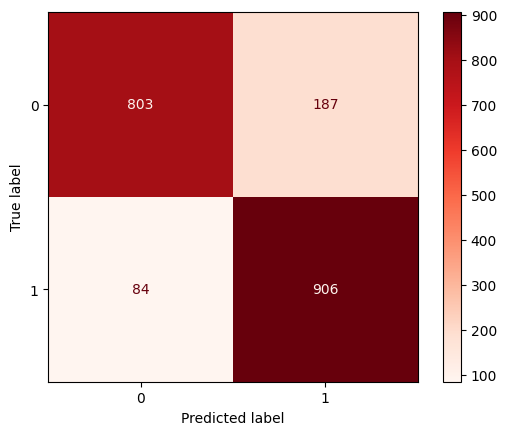

In [93]:
# Evaluation data with KNN
y_pred_train_knn = pipeline_knn.predict(X_train_resampled)
y_pred_test_knn = pipeline_knn.predict(X_test)

print(classification_report(y_train_resampled, y_pred_train_knn))
print(classification_report(y_test, y_pred_test_knn))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline_knn, X_train_resampled, y_train_resampled, cmap='Reds'))

- The result of the train set is 0.92. The results of the train set show that of the 100% of patients who had a stroke, the model was able to detect 92% of the patients while the other 8% of patients failed to be detected.
- The result of the test set is 0.62. The results of the test set show that of the 100% of patients who had a stroke, the model was only able to detect 62% of the patients while the other 38% of patients failed to be detected.
- Based on these two results, it can be concluded that the prediction results of the `KNN` model in this analysis are `underfit`

The next step, we want to find out through the cross validation method, to validate how high the model's ability is to detect positive stroke patients.

In [94]:
# Cross Validation using `cross_val_score`

%%time

cross_val_knn = cross_val_score(pipeline_knn,
                                X_train_resampled,
                                y_train_resampled,
                                cv=3,
                                scoring="recall")

print('Recall Score - All - Cross Validation  : ', cross_val_knn)
print('Recall Score - Mean - Cross Validation : ', cross_val_knn.mean())
print('Recall Score - Std - Cross Validation  : ', cross_val_knn.std())
print('Recall Score - Range of Test-Set       : ', (cross_val_knn.mean()-cross_val_knn.std()) , '-', (cross_val_knn.mean()+cross_val_knn.std()))

Recall Score - All - Cross Validation  :  [0.75151515 0.86363636 0.90606061]
Recall Score - Mean - Cross Validation :  0.8404040404040405
Recall Score - Std - Cross Validation  :  0.06519652348729264
Recall Score - Range of Test-Set       :  0.7752075169167478 - 0.9056005638913331
CPU times: user 313 ms, sys: 2.89 ms, total: 316 ms
Wall time: 411 ms


After carrying out cross validation on the model with a value of nv = 3, the average recall score was found to be 0.84 or it can be interpreted that of 100 patients who had a stroke, the model was only able to detect 84% while the other 16% of patients failed to be detected.

## 9.2.- Support Vector Classification (SVC)

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       990
           1       0.80      0.85      0.82       990

    accuracy                           0.82      1980
   macro avg       0.82      0.82      0.82      1980
weighted avg       0.82      0.82      0.82      1980

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       947
           1       0.14      0.70      0.24        50

    accuracy                           0.78       997
   macro avg       0.56      0.74      0.55       997
weighted avg       0.94      0.78      0.84       997

Confusion Matrix      : 


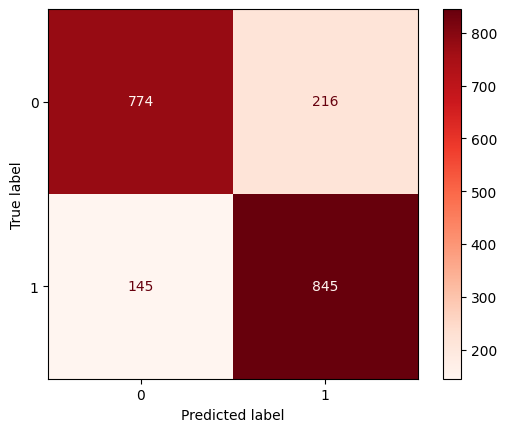

In [95]:
# Evaluation data with SVC
y_pred_train_svc = pipeline_svc.predict(X_train_resampled)
y_pred_test_svc = pipeline_svc.predict(X_test)

print(classification_report(y_train_resampled, y_pred_train_svc))
print(classification_report(y_test, y_pred_test_svc))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline_svc, X_train_resampled, y_train_resampled, cmap='Reds'))

- The result of the train set is 0.85. The results of the train set show that of the 100% of patients who had a stroke, the model was able to detect 85% of the patients while the other 15% of patients failed to be detected.
- The result of the test set is 0.70. The results of the test set show that out of 100% of patients who had a stroke, the model was only able to detect 70% of the patients while the other 30% of patients failed to be detected.
- Based on these two results, it can be concluded that the prediction results of the `SVC` model in this analysis are `underfit`

The next step, we want to find out through the cross validation method, to validate how high the model's ability is to detect positive stroke patients.

In [96]:
# Cross Validation using `cross_val_score`

%%time

cross_val_svc = cross_val_score(pipeline_svc,
                                X_train_resampled,
                                y_train_resampled,
                                cv=3,
                                scoring="recall")

print('Recall Score - All - Cross Validation  : ', cross_val_svc)
print('Recall Score - Mean - Cross Validation : ', cross_val_svc.mean())
print('Recall Score - Std - Cross Validation  : ', cross_val_svc.std())
print('Recall Score - Range of Test-Set       : ', (cross_val_svc.mean()-cross_val_svc.std()) , '-', (cross_val_svc.mean()+cross_val_svc.std()))

Recall Score - All - Cross Validation  :  [0.70909091 0.86666667 0.89393939]
Recall Score - Mean - Cross Validation :  0.8232323232323232
Recall Score - Std - Cross Validation  :  0.08147452456596276
Recall Score - Range of Test-Set       :  0.7417577986663605 - 0.9047068477982859
CPU times: user 538 ms, sys: 5.34 ms, total: 544 ms
Wall time: 740 ms


After carrying out cross validation on the model with a value of nv = 3, the average recall score was found to be 0.82 or it can be interpreted that of 100% of patients who had a stroke, the model was only able to detect 82% while the other 18% of patients failed to be detected .

## 9.3.- Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00       990

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       947
           1       0.12      0.48      0.20        50

    accuracy                           0.81       997
   macro avg       0.55      0.65      0.54       997
weighted avg       0.93      0.81      0.85       997

Confusion Matrix      : 


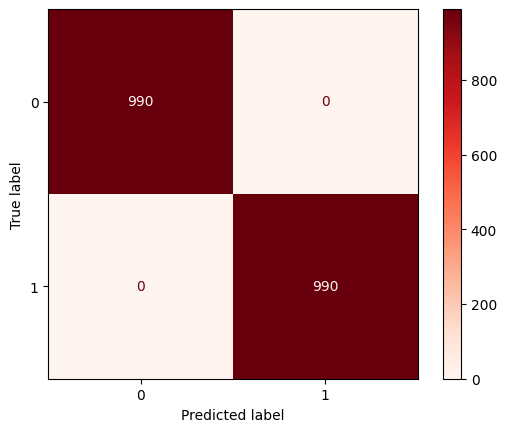

In [97]:
# Evaluation data with Decision Tree
y_pred_train_dt = pipeline_dt.predict(X_train_resampled)
y_pred_test_dt = pipeline_dt.predict(X_test)

print(classification_report(y_train_resampled, y_pred_train_dt))
print(classification_report(y_test, y_pred_test_dt))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline_dt, X_train_resampled, y_train_resampled, cmap='Reds'))

- The result of the train set is 1.00. The results of the train set show that out of 100% of patients who had a stroke, the model was able to detect 100% of the patients.
- The result of the test set is 0.50. The results of the test set show that out of 100% of patients who had a stroke, the model was only able to detect 50% of the patients while the other 50% of patients failed to be detected.
- Based on these two results, it can be concluded that the prediction results of the `Decision Tree` model in this analysis are `underfit`

The next step, we want to find out through the cross validation method, to validate how high the model's ability is to detect positive stroke patients.

In [98]:
# Cross Validation using `cross_val_score`

%%time

cross_val_dt = cross_val_score(pipeline_dt,
                                X_train_resampled,
                                y_train_resampled,
                                cv=3,
                                scoring="recall")

print('Recall Score - All - Cross Validation  : ', cross_val_dt)
print('Recall Score - Mean - Cross Validation : ', cross_val_dt.mean())
print('Recall Score - Std - Cross Validation  : ', cross_val_dt.std())
print('Recall Score - Range of Test-Set       : ', (cross_val_dt.mean()-cross_val_dt.std()) , '-', (cross_val_dt.mean()+cross_val_dt.std()))

Recall Score - All - Cross Validation  :  [0.74848485 0.86969697 0.85757576]
Recall Score - Mean - Cross Validation :  0.8252525252525252
Recall Score - Std - Cross Validation  :  0.05450803055851328
Recall Score - Range of Test-Set       :  0.770744494694012 - 0.8797605558110385
CPU times: user 133 ms, sys: 60 µs, total: 134 ms
Wall time: 156 ms


After carrying out cross validation on the model with a value of nv = 3, the average recall score was found to be 0.82 or it can be interpreted that of 100% of patients who had a stroke, the model was only able to detect 82% while the other 18% of patients failed to be detected .

## 9.4.- Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       990
           1       1.00      1.00      1.00       990

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       947
           1       0.13      0.52      0.20        50

    accuracy                           0.80       997
   macro avg       0.55      0.67      0.54       997
weighted avg       0.93      0.80      0.85       997

Confusion Matrix      : 


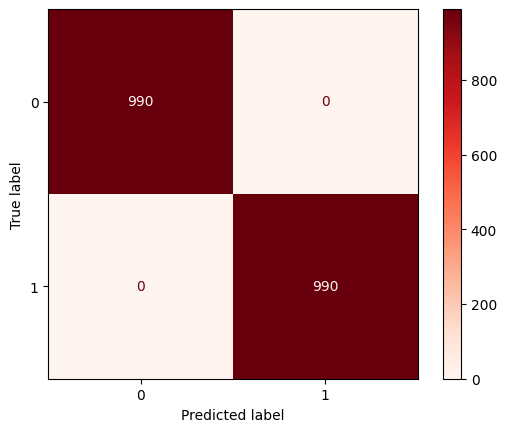

In [99]:
# Evaluation data with Logistic Regression Model
y_pred_train_rf = pipeline_rf.predict(X_train_resampled)
y_pred_test_rf = pipeline_rf.predict(X_test)

print(classification_report(y_train_resampled, y_pred_train_rf))
print(classification_report(y_test, y_pred_test_rf))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline_rf, X_train_resampled, y_train_resampled, cmap='Reds'))

- The result of the train set is 1.00. The results of the train set show that out of 100% of patients who had a stroke, the model was able to detect 100% of the patients.
- The result of the test set is 0.52. The results of the test set show that of the 100% of patients who had a stroke, the model was only able to detect 52% of the patients while the other 48% of patients failed to be detected.
- Based on these two results, it can be concluded that the prediction results of the `Random Forest` model in this analysis are `underfit`

The next step, we want to find out through the cross validation method, how high the model's ability is to detect positive stroke patients.

In [100]:
# Cross Validation using `cross_val_score`

%%time

cross_val_rf = cross_val_score(pipeline_rf,
                                X_train_resampled,
                                y_train_resampled,
                                cv=3,
                                scoring="recall")

print('Recall Score - All - Cross Validation  : ', cross_val_rf)
print('Recall Score - Mean - Cross Validation : ', cross_val_rf.mean())
print('Recall Score - Std - Cross Validation  : ', cross_val_rf.std())
print('Recall Score - Range of Test-Set       : ', (cross_val_rf.mean()-cross_val_rf.std()) , '-', (cross_val_rf.mean()+cross_val_rf.std()))

Recall Score - All - Cross Validation  :  [0.74848485 0.89393939 0.92424242]
Recall Score - Mean - Cross Validation :  0.8555555555555556
Recall Score - Std - Cross Validation  :  0.07671449513554553
Recall Score - Range of Test-Set       :  0.7788410604200101 - 0.9322700506911011
CPU times: user 1.57 s, sys: 3 ms, total: 1.57 s
Wall time: 3.78 s


After carrying out cross validation on the model with a value of nv = 3, the average recall score was found to be 0.85 or it can be interpreted that of 100% of patients who had a stroke, the model was only able to detect 85% while the other 15% of patients failed to be detected .

## 9.5.- AdaBoost

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       990
           1       0.80      0.89      0.84       990

    accuracy                           0.83      1980
   macro avg       0.83      0.83      0.83      1980
weighted avg       0.83      0.83      0.83      1980

              precision    recall  f1-score   support

           0       0.98      0.76      0.85       947
           1       0.12      0.64      0.20        50

    accuracy                           0.75       997
   macro avg       0.55      0.70      0.53       997
weighted avg       0.93      0.75      0.82       997

Confusion Matrix      : 


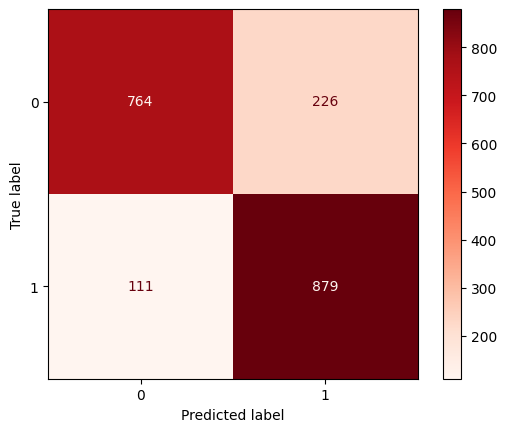

In [101]:
# Evaluation data with Logistic Regression Model
y_pred_train_ada = pipeline_ada.predict(X_train_resampled)
y_pred_test_ada = pipeline_ada.predict(X_test)

print(classification_report(y_train_resampled, y_pred_train_ada))
print(classification_report(y_test, y_pred_test_ada))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeline_ada, X_train_resampled, y_train_resampled, cmap='Reds'))

- The result of the train set is 0.89. The results of the train set show that of the 100% of patients who had a stroke, the model was able to detect 89% of the patients while the other 11% of patients failed to be detected.
- The result of the test set is 0.64. The results of the test set show that of the 100% of patients who had a stroke, the model was only able to detect 64% of the patients while the other 36% of patients failed to be detected.
- Based on these two results, it can be concluded that the prediction results of the `AdaBoost` model in this analysis are `underfit`

The next step, we want to find out through the cross validation method, how high the model's ability is to detect positive stroke patients.

In [102]:
# Cross Validation using `cross_val_score`

%%time

cross_val_ada = cross_val_score(pipeline_ada,
                                X_train_resampled,
                                y_train_resampled,
                                cv=3,
                                scoring="recall")

print('Recall Score - All - Cross Validation  : ', cross_val_ada)
print('Recall Score - Mean - Cross Validation : ', cross_val_ada.mean())
print('Recall Score - Std - Cross Validation  : ', cross_val_ada.std())
print('Recall Score - Range of Test-Set       : ', (cross_val_ada.mean()-cross_val_ada.std()) , '-', (cross_val_ada.mean()+cross_val_ada.std()))

Recall Score - All - Cross Validation  :  [0.72121212 0.88484848 0.93939394]
Recall Score - Mean - Cross Validation :  0.8484848484848485
Recall Score - Std - Cross Validation  :  0.09270944570168703
Recall Score - Range of Test-Set       :  0.7557754027831615 - 0.9411942941865356
CPU times: user 792 ms, sys: 4.91 ms, total: 797 ms
Wall time: 1.13 s


After carrying out cross validation on the model with a value of nv = 3, the average recall score was found to be 0.85 or it can be interpreted that of 100% of patients who had a stroke, the model was only able to detect 85% while the other 15% of patients failed to be detected .

The next step is, we want to choose the **Best Model** from the five existing models based on the results of the mean cross validation of each model. The summary is as follows:
- KNN Mean Cross Validation: 0.8404
- SVC Mean Cross Validation: 0.8232
- DT Mean Cross Validation: 0.8252
- RF Mean Cross Validation: 0.8555
- Adaboost Mean Cross Validation: 0.8484

From the cross validation results, it was found that the best model in the five models that had been evaluated was `Random Forest` Mean Cross Validation of 0.8555.

## 9.6.- Best Model Improvement

We will carry out hyperparameter tuning with gridsearch to improve the best Random Forest model.

### 9.6.1.- Grid Search

First of all, we will choose what parameters will be tuned.

In [103]:
# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'classifier_rf__n_estimators' : [int(x) for x in np.linspace(1, 10, 1)],
    'classifier_rf__max_depth' : [int(x) for x in np.linspace(1, 10, 1)],
    'classifier_rf__min_samples_leaf' : [4, 5, 6],
    'classifier_rf__min_samples_split' : [5, 6, 7]

}

In [104]:
# Create a GridSearchCV object
grid_rf = GridSearchCV    (pipeline_rf,
                           param_grid=param_grid_rf,
                           verbose=3,
                           refit=True,
                           scoring ='recall',
                           cv=2,
                           return_train_score=True,
                           n_jobs=2)

In [105]:
%%time
# Fit the GridSearchCV object to the training data
grid_rf.fit(X_train_resampled, y_train_resampled) # INI X_train doang

Fitting 2 folds for each of 9 candidates, totalling 18 fits
CPU times: user 197 ms, sys: 78 ms, total: 275 ms
Wall time: 4.59 s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_n',
                                                                         Pipeline(steps=[('scaler_n',
                                                                                          StandardScaler())]),
                                                                         ['bmi']),
                                                                        ('num_s',
                                                                         Pipeline(steps=[('scaler_s',
                                                                                          MinMaxScaler())]),
                                                                         ['hypertension',
                                                                          'heart_disease',
                                                                          'avg_glucose_level']),
                                                                        ('cat_n',
                                                                         Pipeline(steps=[('encoder_n',
                                                                                          OneHotEncoder())]),
                                                                         ['group_age',
                                                                          'ever_married'])])),
                                       ('classifier_rf',
                                        RandomForestClassifier(random_state=97))]),
             n_jobs=2,
             param_grid={'classifier_rf__max_depth': [1],
                         'classifier_rf__min_samples_leaf': [4, 5, 6],
                         'classifier_rf__min_samples_split': [5, 6, 7],
                         'classifier_rf__n_estimators': [1]},
             return_train_score=True, scoring='recall', verbose=3)

In [106]:
# Print the best parameters and the corresponding recall score
grid_rf.best_params_

{'classifier_rf__max_depth': 1,
 'classifier_rf__min_samples_leaf': 4,
 'classifier_rf__min_samples_split': 5,
 'classifier_rf__n_estimators': 1}

> Based on the results of hyperparameter tuning using grid search methods, it was found that the best parameters were
- max_depth: 1
- min_samples_leaf: 4
- min_samples_split: 5
- n_estimators: 1

In [107]:
print("Best Recall score:", grid_rf.best_score_)

Best Recall score: 0.9757575757575758


In [108]:
# Get Best Estimator
rf_gridcv_best = grid_rf.best_estimator_

              precision    recall  f1-score   support

           0       0.98      0.36      0.52       990
           1       0.61      0.99      0.75       990

    accuracy                           0.67      1980
   macro avg       0.79      0.67      0.64      1980
weighted avg       0.79      0.67      0.64      1980

              precision    recall  f1-score   support

           0       0.99      0.35      0.51       947
           1       0.07      0.94      0.13        50

    accuracy                           0.38       997
   macro avg       0.53      0.64      0.32       997
weighted avg       0.94      0.38      0.49       997

Confusion Matrix      : 


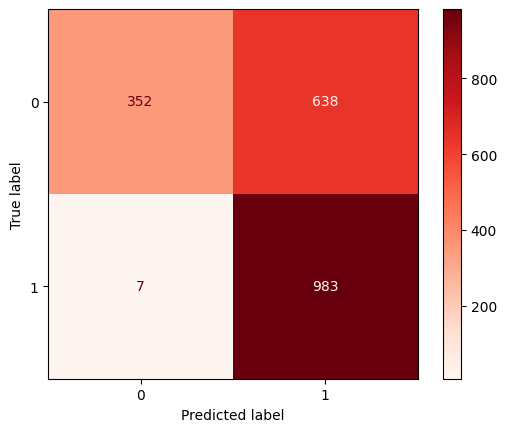

In [109]:
# Evaluation data with Logistic Regression Model
y_pred_train_cv = rf_gridcv_best.predict(X_train_resampled)
y_pred_test_cv = rf_gridcv_best.predict(X_test)

print(classification_report(y_train_resampled, y_pred_train_cv))
print(classification_report(y_test, y_pred_test_cv))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_train_resampled, y_train_resampled, cmap='Reds'))

- The result of the train set is 0.99. The results of the train set show that of the 100% of patients who had a stroke, the model was able to detect 99% of the patients while the other 1% of patients failed to be detected.
- The result of the test set is 0.94. The results of the test set show that of the 100% of patients who suffered a stroke, the model was only able to detect 94% of the patients while the other 6% of patients failed to be detected.
- Based on these two results, it can be concluded that the model prediction results in this analysis are `goodfit`

The next step, we want to find out through the cross validation method, how high the model's ability is to detect positive stroke patients.

### 9.6.2.- Cross Validation

In [110]:
# Cross Validation using `cross_val_score`

%%time

cross_val_grid = cross_val_score(rf_gridcv_best,
                                X_train_resampled,
                                y_train_resampled,
                                cv=4,
                                scoring="recall")

print('Recall Score - All - Cross Validation  : ', cross_val_grid)
print('Recall Score - Mean - Cross Validation : ', cross_val_grid.mean())
print('Recall Score - Std - Cross Validation  : ', cross_val_grid.std())
print('Recall Score - Range of Test-Set       : ', (cross_val_grid.mean()-cross_val_grid.std()) , '-', (cross_val_grid.mean()+cross_val_grid.std()))

Recall Score - All - Cross Validation  :  [0.90688259 1.         1.         1.        ]
Recall Score - Mean - Cross Validation :  0.9767206477732794
Recall Score - Std - Cross Validation  :  0.04032102082397184
Recall Score - Range of Test-Set       :  0.9363996269493076 - 1.0170416685972512
CPU times: user 176 ms, sys: 627 µs, total: 177 ms
Wall time: 234 ms


> After carrying out cross validation on the model with a value of nv = 3, the average recall score was found to be 0.97 or it can be interpreted that of 100% of patients who had a stroke, the model was only able to detect 97% while the other 3% of patients failed detected.

# 10.- Model Saving

In [111]:
with open('rf_gridcv_best.pkl', 'wb') as file_1:
  pickle.dump(rf_gridcv_best,file_1)

# 11. Model Inference

The inference model is in a new notebook with the name `P1M2_hasan_abdul_inf.ipynb`

# 12.- Conclusion

1. EDA
  1. From the data above, it was found that 248 out of 4981 patients were positive for stroke.
  2. Patients in the Young Adult age group (19-45 years) constitute the majority population in the data.
  3. Hypertension has a significant correlation with stroke with a correlation level of 13%. There were 26.6% or 66 stroke patients who had hypertension.
  4. Heart Attack has a significant correlation with stroke with a correlation level of 13%. There are 19% or 47 stroke patients who have heart disease.
  5. The average of avg_glucose_level in the data is 105.94. There is a significant positive relationship between avg glucose level and stroke of 7%.
  6. The average value of BMI is 28.5. It was found that there was a significant positive relationship between BMI and stroke of 5%.
  7. The majority of stroke patients are elderly with a total of 159 patients. This figure represents 64.1% of stroke patients in the data. There is a significant influence between group age and stroke.
  8. The majority of patients in the data were non-smokers with a total of 1838 patients but no significant correlation was found with stroke.
  9. Most stroke patients based on gender are female with a total of 140 patients (56.5%).
  10. There were 219 stroke patients who were married, which was 88.3% of stroke patients. In addition, a significant positive relationship was found between ever married and stroke of 11%.
  11. The majority of work types in the data are private and no correlation was found with stroke.
  12. There are 135 stroke patients living in urban areas, 54.4% of the data. Meanwhile, 113 other patients live in rural areas. Next, we want to see the level of correlation between residence type and stroke.

2. Model Evaluation
- KNN
  - The result of the train set is 0.92 and the test set is 0.62.
  - Based on these two results, it can be concluded that the prediction results of the `KNN` model in this analysis are `underfit`

- SVC
  - The result of the train set is 0.85 and the test set is 0.70.
  - Based on these two results, it can be concluded that the prediction results of the `SVC` model in this analysis are `underfit`

- D.T
  - The result of the train set is 1.00 and the result of the test set is 0.52.
  - Based on these two results, it can be concluded that the prediction results of the `Decision Tree` model in this analysis are `underfit`

- Random Forest
  - The result of the train set is 1.00 and the result of the test set is 0.52.
  - Based on these two results, it can be concluded that the prediction results of the `Random Forest` model in this analysis are `underfit`

- AdaBoost
  - The result of the train set is 0.89 and the result of the test set is 0.64.
  - Based on these two results, it can be concluded that the prediction results of the `AdaBoost` model in this analysis are `underfit`

3. Model Analysis
    - > - Best Model from Cross Validation Comparison
          The summary is as follows:
          - KNN Mean Cross Validation: 0.8404
          - SVC Mean Cross Validation: 0.8232
          - DT Mean Cross Validation: 0.8222
          - RF Mean Cross Validation: 0.8606
          - Adaboost Mean Cross Validation: 0.8484
        From the cross validation results, it was found that the best model in the five models that had been evaluated was a Random Forest Mean Cross Validation of 0.8606.

    - > Based on the results of hyperparameter tuning using grid search methods, it was found that the best parameters were
      - max_depth: 1
      - min_samples_leaf: 4
      - min_samples_split: 5
      - n_estimators: 1

    - > > After carrying out cross validation on the model with a value of nv = 3, the average recall score was found to be 0.97 or it can be interpreted that of 100% of patients who had a stroke, the model was only able to detect 97% while 3% of patients others failed to be detected.

4. Improvement
  - Add sample data from stroke positive patients in the data
  - Update the `work_type` data, especially the `Private` type because there is a possibility that the variable has an effect on the target
  - Updated the `smoking_status` data, especially the `Unknown` type because there is a possibility that the variable has an influence on the target
  - Try tuning another model based on the results of the baseline model, namely the SVC model